# Spatial Transcriptomics
</p>  
In this tutorial we are going to run through how UCDeconvolve can be used to aid in the analysis and annotation of
visium spatial transcriptomics data. For this tutorial, we will perform a cell type deconvolution of a spatial gene expression section of the <a href="https://www.10xgenomics.com/resources/datasets/human-lymph-node-1-standard-1-0-0">human lymph node</a>, made available by 10X Genomics. We will utilize scanpy to quickly load the dataset, and then pass it into ucdeconvolve to obtain cell type predictions.
</p>

## Loading Packages & Authenticating
The first step in this analysis will be to load scanpy and ucdeconvolve after following the installation and registration instructions, and
authenticate our API. In this tutorial we saved our user access token in the variable ``TOKEN``.

In [25]:
import scanpy as sc
import ucdeconvolve as ucd

ucd.api.authenticate(TOKEN)

2023-04-25 16:55:04,945|[UCD]|INFO: Updated valid user access token.


## Read Lymph Node Dataset

We begin by loading the *V1_Human_Lymph_Node* dataset from *10X Genomics* made available in the ``sc.datasets.visium_sge``
utility function.

In [ ]:
adata = sc.datasets.visium_sge("V1_Human_Lymph_Node")

Let's perform some basic preprocessing on this dataset so we have some expression clusters to compare our downstream
results with.

In [9]:
adata.raw = adata

sc.pp.recipe_seurat(adata)

sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata)

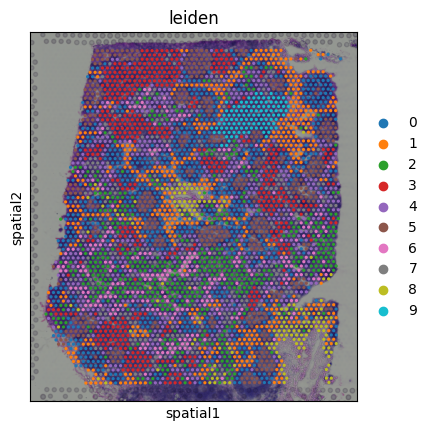

In [15]:
sc.pl.spatial(adata, color = 'leiden')

## Run UCDBase

We begin by obtaining context-free cell type predictions using UCDBase. 

In [5]:
ucd.tl.base(adata)

2023-04-25 16:27:40,012|[UCD]|INFO: Starting UCDeconvolveBASE Run. | Timer Started.
Preprocessing Dataset | 100% (16 of 16) || Elapsed Time: 0:00:02 Time:  0:00:02
2023-04-25 16:27:43,509|[UCD]|INFO: Uploading Data | Timer Started.
2023-04-25 16:27:49,367|[UCD]|INFO: Upload Complete | Elapsed Time: 5.857 (s)
Waiting For Submission : UNKNOWN | Queue Size : 0 | \ |#| 2 Elapsed Time: 0:00:03
Waiting For Submission : QUEUED | Queue Size : 1 | | |#| 3 Elapsed Time: 0:00:04
Waiting For Submission : RUNNING | Queue Size : 1 | | |#| 3 Elapsed Time: 0:00:04
Waiting For Completion | 100% (4035 of 4035) || Elapsed Time: 0:00:45 Time:  0:00:45
2023-04-25 16:28:42,073|[UCD]|INFO: Download Results | Timer Started.
2023-04-25 16:28:42,817|[UCD]|INFO: Download Complete | Elapsed Time: 0.743 (s)
2023-04-25 16:28:43,466|[UCD]|INFO: Run Complete | Elapsed Time: 63.453 (s)


## Visualizing Results
We can print our adata object to see what new information has been added to it. UCD appends the results of each deconvolution run into <i>'adata.obsm'</i> along with column names (i.e. celltypes) and run information into <i>'adata.uns'</i> under the default results stem <i>'ucdbase'</i>. Depending on whether or not the <i>split</i> parameter was set to True or False, you will either see a single new entry into <i>'adata.obsm'</i> or three entries. By default, <i>split = True</i> so predictions will be split into primary (non-malignat), cell lines, and primary cancer (malignant). raw unsplit predictions are also saved.

In [7]:
adata

AnnData object with n_obs × n_vars = 4035 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'ucdbase'
    obsm: 'spatial', 'ucdbase_cancer', 'ucdbase_lines', 'ucdbase_primary', 'ucdbase_raw'

Let's start by reading our results in their raw, unpropagated form and see what top cell type predictions exist in this sample. Note that since this is a visium sample, these deconvolution
represent actual predicted cell type mixtures and not individual cell phenotypes.

In [35]:
ucd.utils.read_results(adata, category = 'raw').head(5)

,germinal center b cell,igg memory b cell,naive t cell,common dendritic progenitor,follicular b cell,immature b cell,"effector cd4-positive, alpha-beta t cell",endothelial cell of lymphatic vessel,t cell,"naive thymus-derived cd4-positive, alpha-beta t cell",...,oogonial cell,contractile cell,polar body,natural killer cell cell,b-1a b cell,supporting cell of cochlea,bone marrow cell,pre-natural killer cell,kidney granular cell,splenic red pulp macrophagec
AAACAAGTATCTCCCA-1,0.107994,0.118136,0.079384,0.094625,0.046563,0.059231,0.031747,0.020969,0.022492,0.006955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAATCTACTAGCA-1,0.210373,0.019785,0.241911,0.081217,0.008128,0.007391,0.027828,0.007141,0.004119,0.214080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACACCAATAACTGC-1,0.114059,0.096963,0.018223,0.063723,0.031963,0.034795,0.007577,0.110919,0.042955,0.000502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,0.348411,0.028202,0.009421,0.019920,0.069834,0.010529,0.000306,0.003792,0.289740,0.000523,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGCTTTCAGAAG-1,0.100210,0.118197,0.040606,0.136658,0.181446,0.041983,0.018380,0.011223,0.005778,0.005383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can visualize our results by using one of the built-in plotting functions in UCD, which wrap scanpy's plotting API.

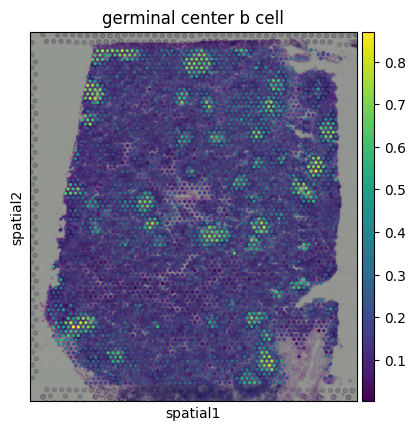

In [28]:
ucd.pl.spatial(adata, color = "germinal center b cell")

### Advanced Visualization

Many times it can be useful to plot multiple cell type densities on the same spatial plot. To do this, 
``ucd.pl.spatial`` extends the functionality of scanpy's spatial plotting functions to allow us to plot multiple
cell type predictions. We offer a set of colormaps under ``ucd.pl.CM`` inspired by cell2location [Kleshchevnikov et. al. 2022] that can be
used as overlay colors.

<Axes: xlabel='spatial1', ylabel='spatial2'>

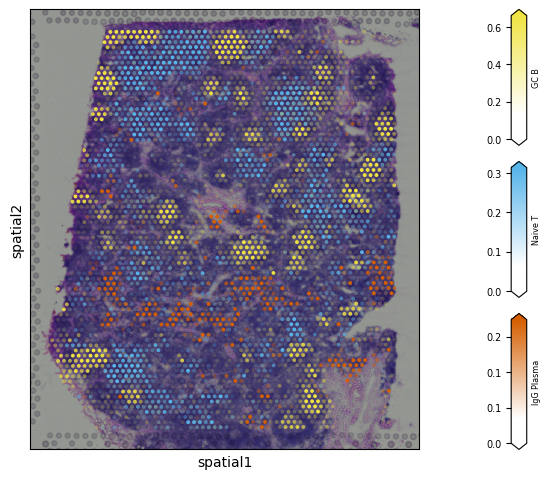

In [34]:
ucd.pl.spatial(adata, 
    color = ["germinal center b cell", "naive t cell", "igg plasma cell"],
    labels = ['GC B', "Naive T", "IgG Plasma"],
    colormaps = [ucd.pl.CM.Yellow, ucd.pl.CM.Blue, ucd.pl.CM.Orange],
    cbar_nrows=3
)